----------
Mijozning noroziligini (customer churn) aniqlash
-----------

Biznesda eng ko'p uchraydigan muammolardan biri. Mijozning kayfiyatini aniqlash.

Agar biznes egasi mijoz qaytmasligini, maxsulot yoki xizmatdan qayta foydanalmasligini oldindan bashorat qila olsa, mijozni ushlab qolish uchun, uning fikrini o'zgartirish uchun harakat qilishi mumkin.

Ushbu amaliyotda biz online do'kon xaridorlari ma'lumotlarini tahlil qilish orqali mijozning qolish-qolmasligini bashorat qilamiz.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

Ma'lumotlarni o'qiymiz.

In [5]:
url="C:\Yangi jild\Data_science_praktikum\MAchine_Learning_Cali\Klassification/telecom_churn.csv"

df = pd.read_csv(url)

df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Datasetni o'lchamlari

In [6]:
df.shape

(3333, 11)

Ma'lumotlarni tahlil qilamiz

Churn-Kayfiyati,

AccountWeeks - Hisob haftalari,

ContractRenewal - Shartnomani yangilash,

DataPlan - Ma'lumotlar rejasi,

DataUsage - Ma'lumotlardan foydalanish,

CustServCalls - Cust Service qo'ng'iroqlari,

DayMins - Kun min,

DayCalls - Kunduzgi qo'ng'iroqlar,

MonthlyCharge - Oylik to'lov,

OverageFee - Ortiqcha to'lov,

RoamMins - Roum Mins

df jadvalini o'rganamiz:
    
Ya'ni None qiymatlar bor yoki yo'qligini va nechta elemetnlar borligini tekshiramiz

Jadvalimizda None qiymatlar yo'q ekan, bu esa ishlarimizni osonlashtiradi

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Biz uchun muhim ustun bu Churn ustuni, aynan shu ustun label (ya'ni bashorat qilinuvchi klass) vazifasini bajaradi.

Keling bu ustundagi qiymatlar nisbatini ko'ramiz:

2850 mijoz qayta xarid qilgan (qolgan) - 0

483 ta mijoz ketib qolgan - 1

In [12]:
df['Churn'].value_counts()/len(df)*100

Churn
0    85.508551
1    14.491449
Name: count, dtype: float64

Nisbatini chiqaramiz:

Ya'ni doira ko'rinishida chiqaramiz

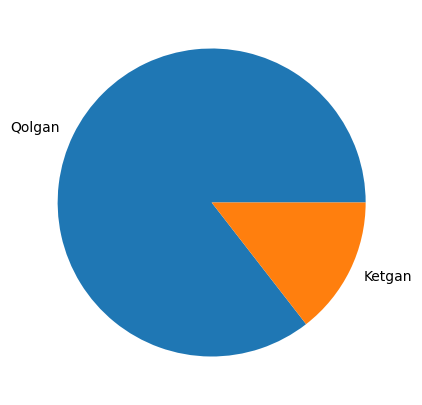

In [15]:
churn_rate = df['Churn'].value_counts()/len(df)*100

plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

Ba'zi sonli ustunlarni tahlil qilib ko'ramiz

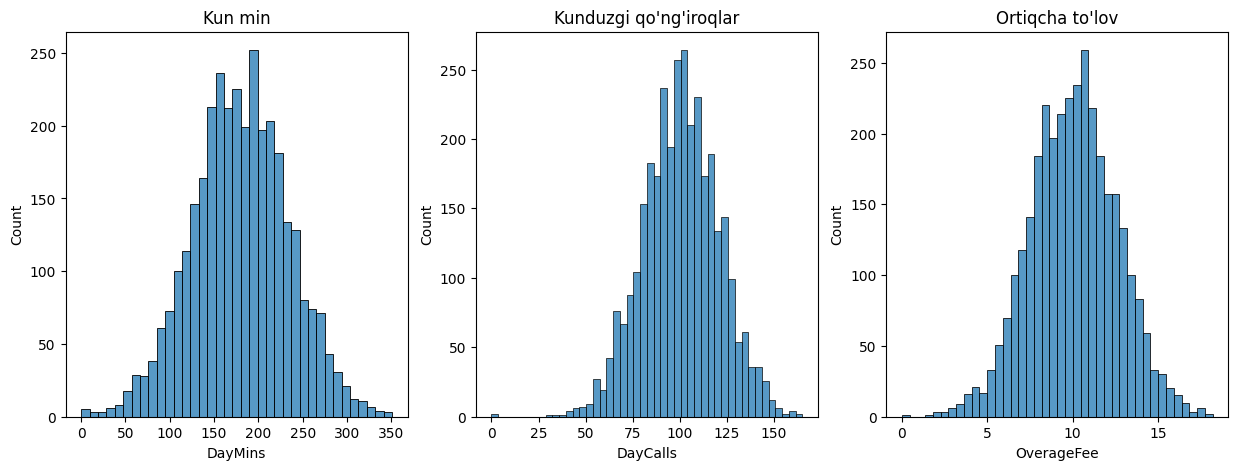

In [18]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure - Egalik
sns.histplot(x="DayMins", data=df, ax=axes[0])
axes[0].set_title("Kun min")

#OrderCount - Buyurtmalar soni
sns.histplot(x="DayCalls", data=df, ax=axes[1])
axes[1].set_title("Kunduzgi qo'ng'iroqlar")

# Cashback - Keshbek
sns.histplot(x="OverageFee", data=df, ax=axes[2])
axes[2].set_title("Ortiqcha to'lov")

plt.show()

Kategoriyali ustunlarni tahlil qilamiz: 1 va 0 

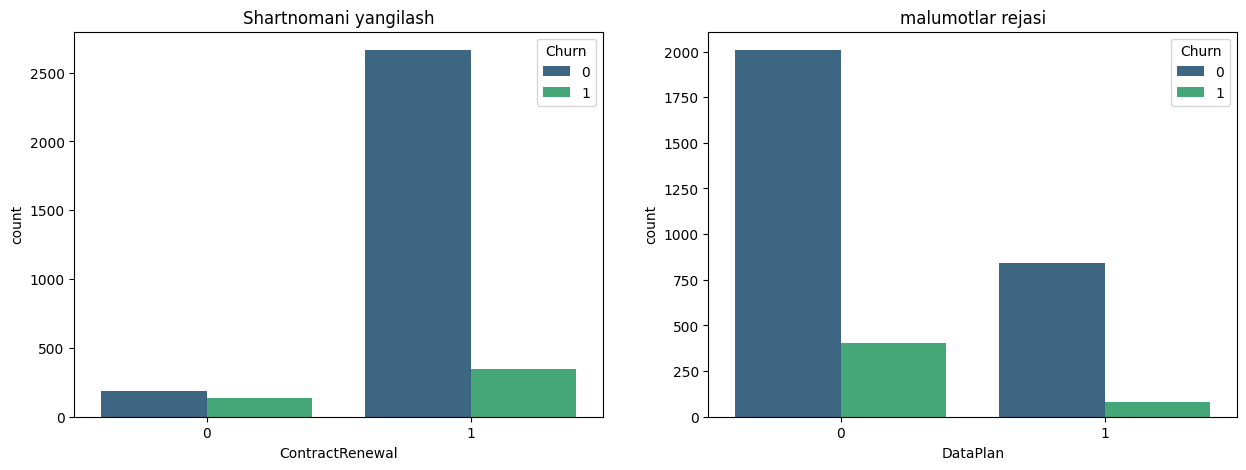

In [54]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='ContractRenewal', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Shartnomani yangilash")

sns.countplot(x='DataPlan', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("malumotlar rejasi")

plt.show()

Biz uchun asosiy bo'lgan Churn ustunini boshqa ustunlari bog'liqligini solishtirish

In [26]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn              1.000000
ContractRenewal    0.259852
CustServCalls      0.208750
DayMins            0.205151
DataPlan           0.102148
OverageFee         0.092812
DataUsage          0.087195
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
dtype: float64

--------------
ML ga tayyorgarlik
-------------

Kerakli `Churn` ustunnidan boshqalarini X ga, `Churn` ustunini faqat o'zini Y ga saqlaymiz

In [31]:
X = df.drop("Churn", axis=1)
Y = df['Churn']

X qiymatlarini Standartlashtirib olamiz, bu ishlashimiz uchun yaxshi bo'ladi

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Endi modelimizni qismlarga ajratib olamiz.

In [39]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

Machine Learning
-------
`Logistic Regression`

Bu usulda eng yomon ko'rsatgichlarni oldik

ROC curve grafigi to'g'ri burchakliga jaqin bo'lishi berak edi, lekin unday bo'lmadi

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       570
           1       0.61      0.21      0.31        97

    accuracy                           0.87       667
   macro avg       0.74      0.59      0.62       667
weighted avg       0.84      0.87      0.84       667

Model aniqligi: 0.8650674662668666


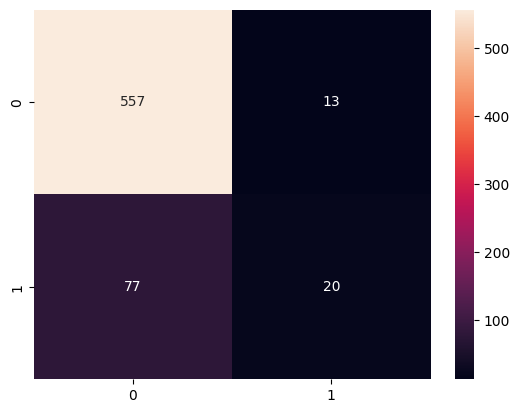

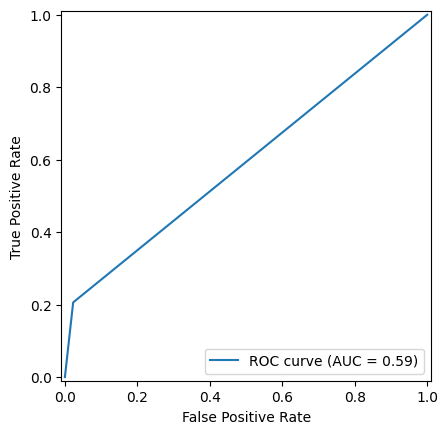

In [42]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)

# Modelni baholaymiz
Y_pred = LR_model.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))
print("Model aniqligi:", metrics.accuracy_score(Y_test,Y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

`Support Vector Machines`

Bu model oldingi Logistic Regression modelidan yaxshiroq chiqdi

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       570
           1       0.92      0.58      0.71        97

    accuracy                           0.93       667
   macro avg       0.93      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667

Model aniqligi: 0.9310344827586207


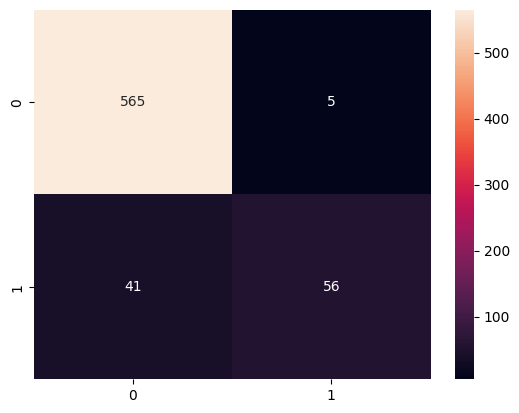

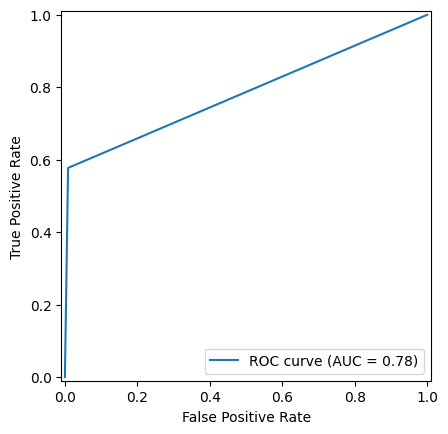

In [46]:
# Modelni yaratamiz (training)
SVM_model = SVC()
SVM_model.fit(X_train, Y_train)

# Modelni baholaymiz
Y_pred = SVM_model.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))
print("Model aniqligi:", metrics.accuracy_score(Y_test,Y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

`Decision Tree`

Bu model `Support Vector Machines` modelidan unchalik yaxshi emas

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.70      0.66      0.68        97

    accuracy                           0.91       667
   macro avg       0.82      0.81      0.81       667
weighted avg       0.91      0.91      0.91       667

Model aniqligi: 0.9100449775112444


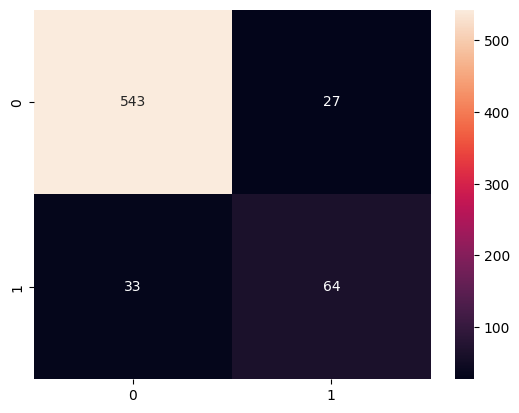

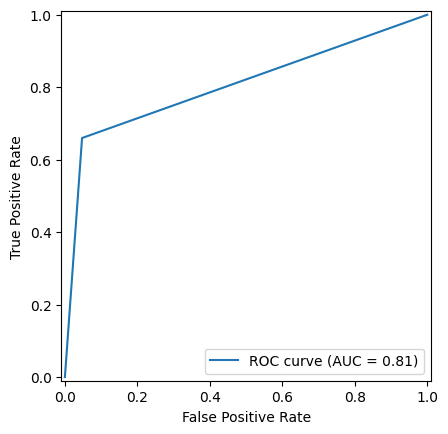

In [48]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

# Modelni baholaymiz
Y_pred = tree_model.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))
print("Model aniqligi:", metrics.accuracy_score(Y_test,Y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

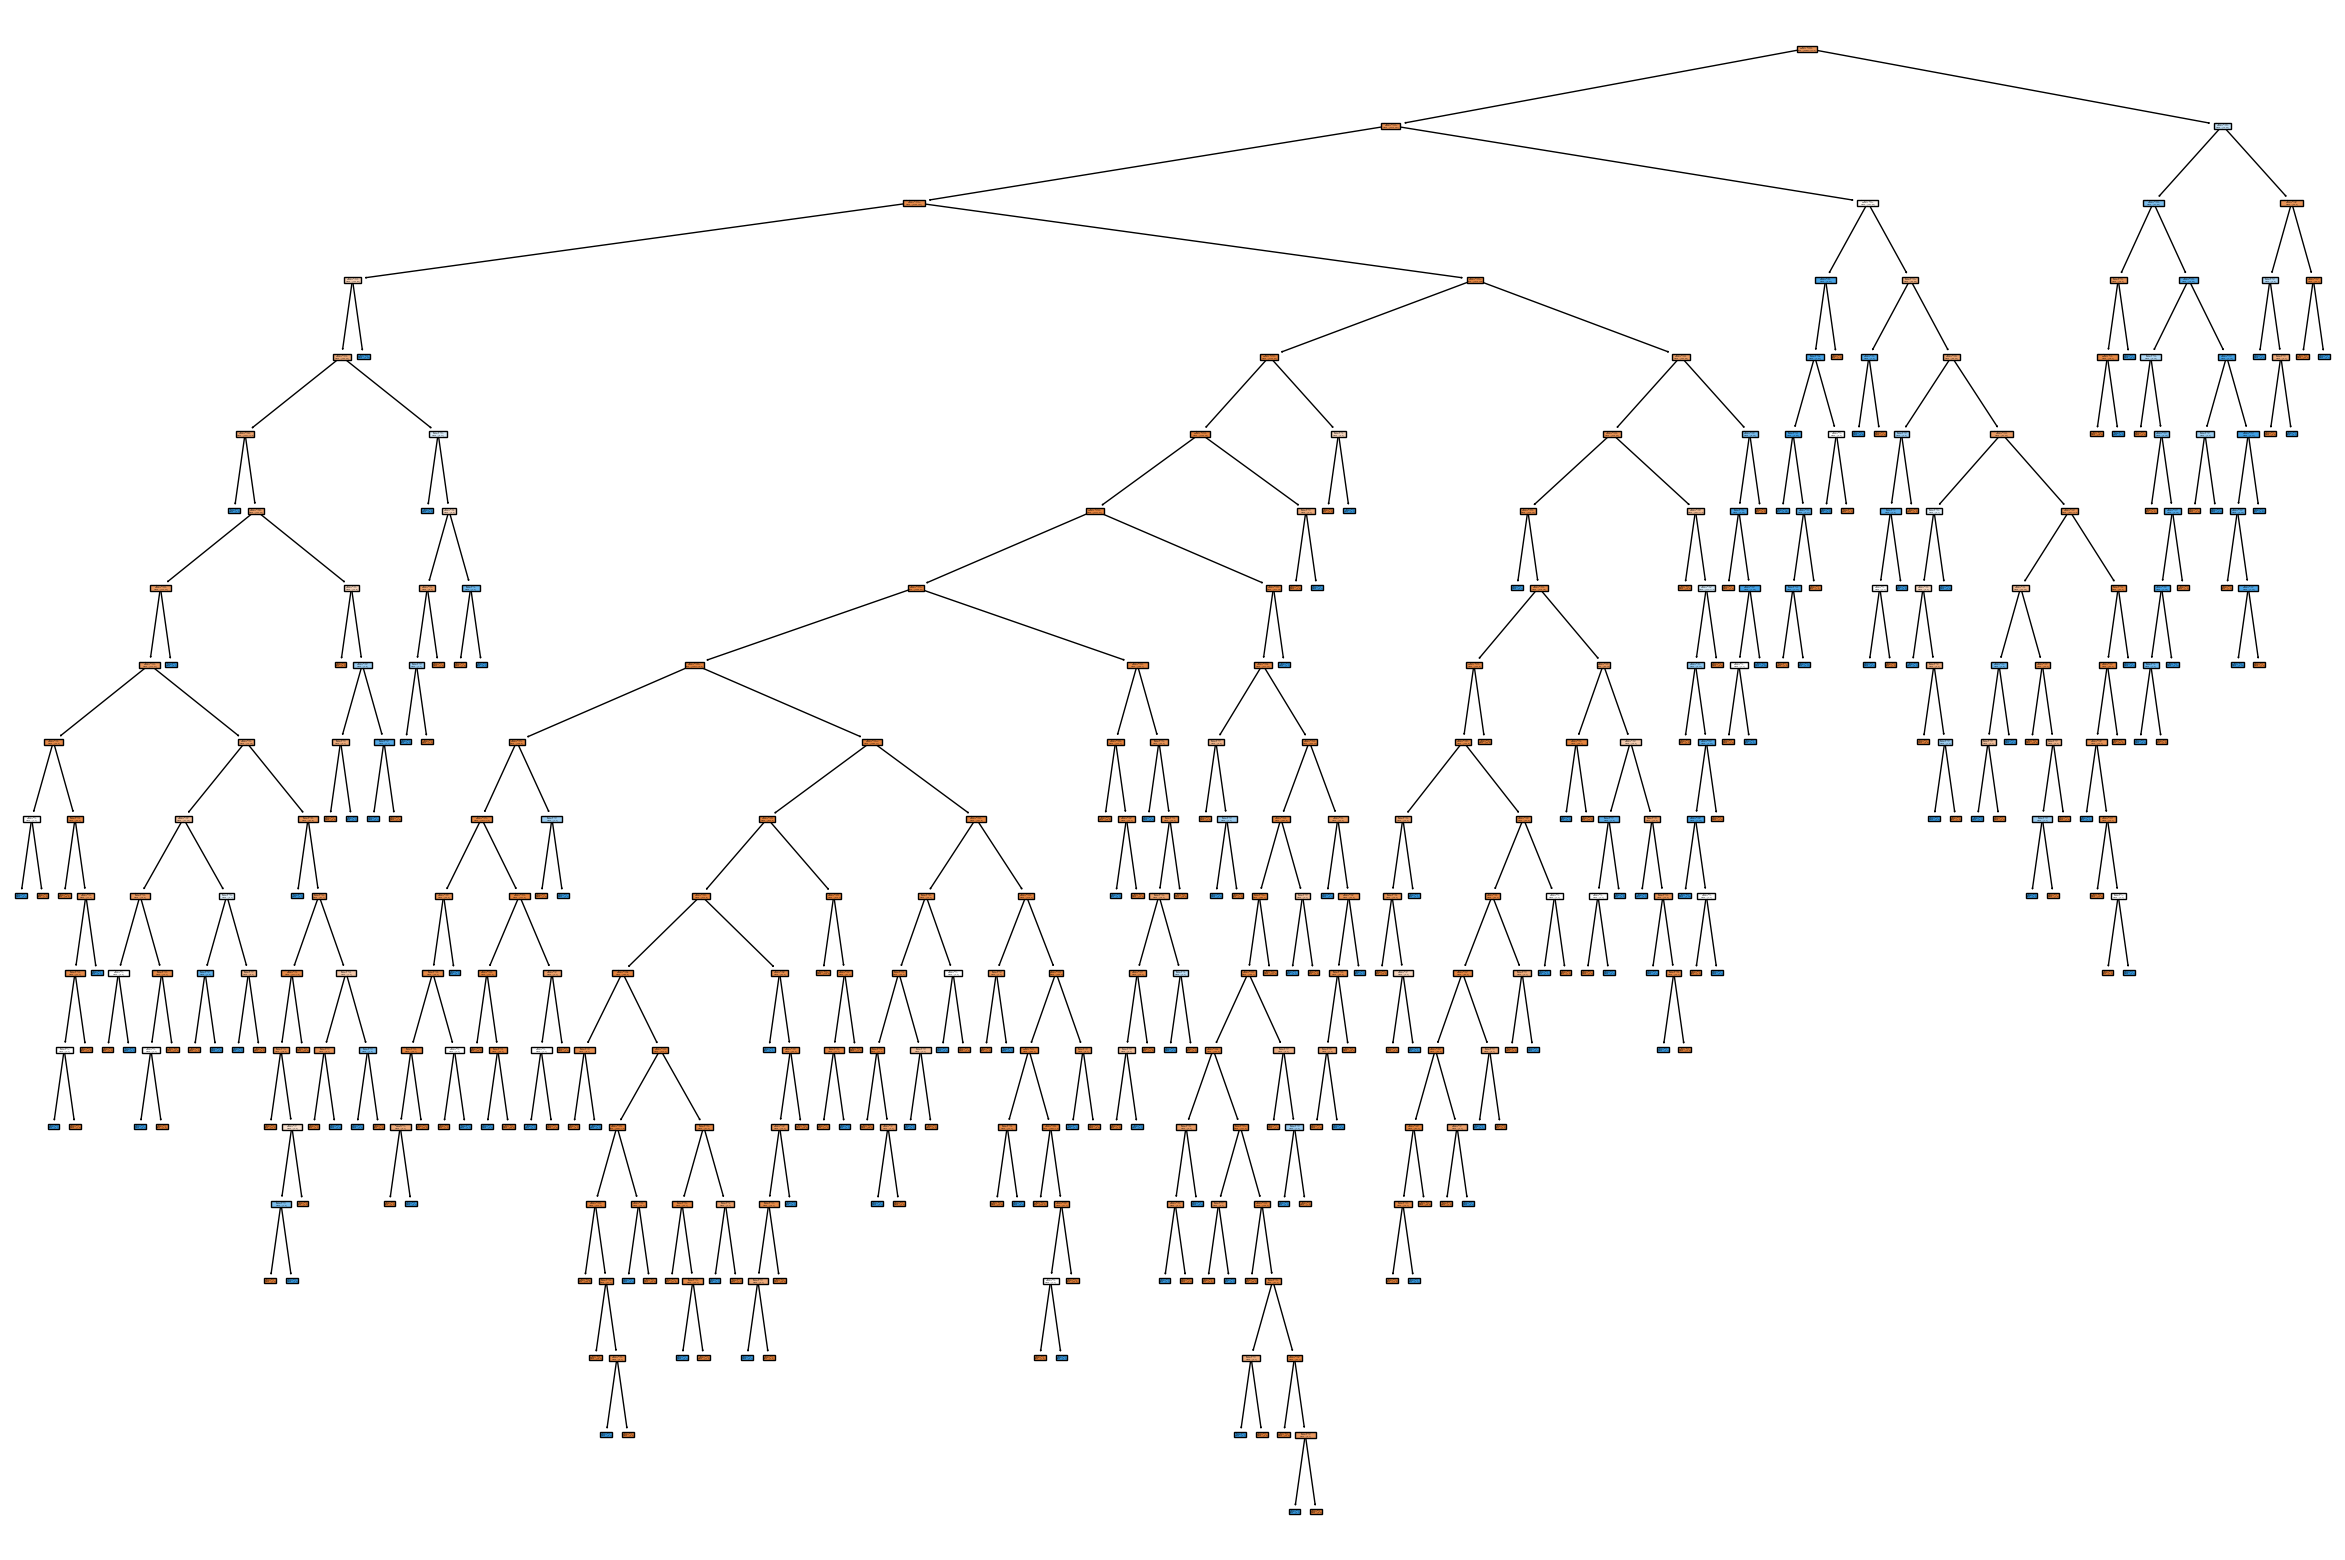

In [51]:
cols = df.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

`Random Forest`

Random Forest, ma'lumotlar tahlilidagi (data analysis) va ma'lumotlar o'rganish (data mining) bo'limida ko'p o'rganiladigan, ko'p qo'llaniladigan bir ma'lumotlar tahlil algoritmi hisoblanadi.

Bu model oldingi hamma modellardan yaxshi natijani ko'rsatmoqda...

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.89      0.68      0.77        97

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

Model aniqligi: 0.9415292353823088


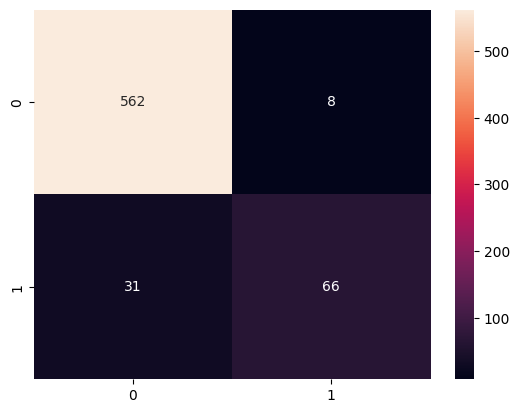

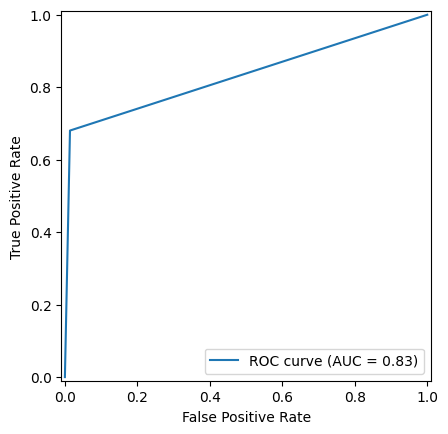

In [52]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, Y_train)

# Modelni baholaymiz
Y_pred = RF_model.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))
print("Model aniqligi:", metrics.accuracy_score(Y_test,Y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

`XGBoost`


XGBoost (eXtreme Gradient Boosting), gradient bosting yoki gradient darajasi qo'llash (GBM) algoritmini kuchaytirilgan versiyasi hisoblanadi va ma'lumotlar tahlili va tajribalar dasturlash sohalarida yetarli samarali va chuqur o'rganilgan algoritm sifatida taniladi. 

Bu modelni eng yaxshisi deb atasak ham bo'lavaradi

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.92      0.75      0.83        97

    accuracy                           0.96       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667

Model aniqligi: 0.9550224887556222


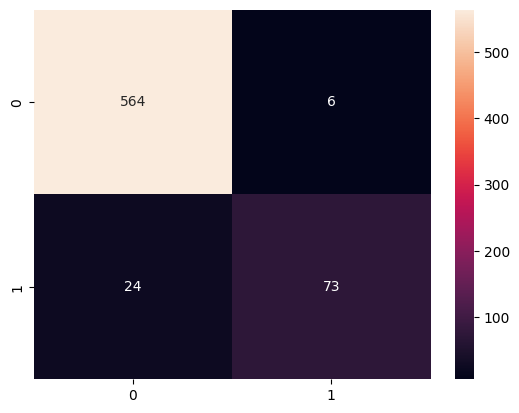

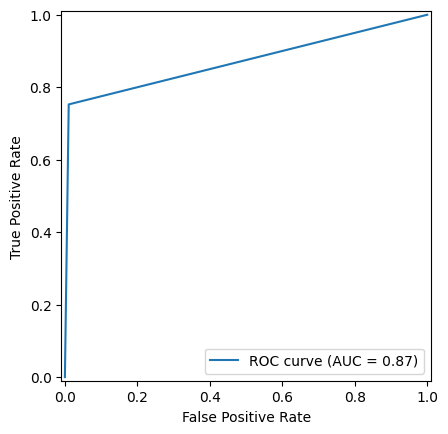

In [53]:
# Modelni yaratamiz (training)
XGB_model = XGBClassifier()
XGB_model.fit(X_train, Y_train)

# Modelni baholaymiz
Y_pred = XGB_model.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))
print("Model aniqligi:", metrics.accuracy_score(Y_test,Y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()